## F.1 N-dimensional Arrays

In [1]:
import numpy as np

In [5]:
lst = [[1, 2, 3],
       [4, 5, 6]]
    
ary1d = np.array(lst)
ary1d

array([[1, 2, 3],
       [4, 5, 6]])

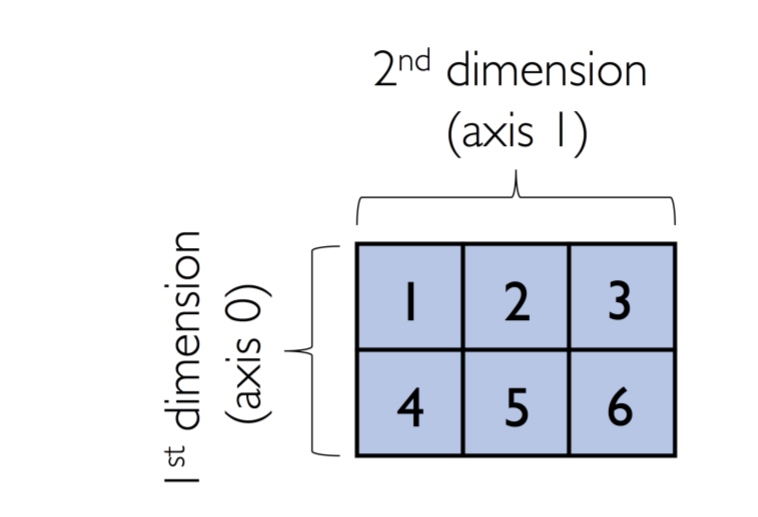

In [6]:
ary1d.dtype

# dtype = np.int32 --> 32bit arr
# https://numpy.org/doc/stable/user/basics.types.html -> datatype

dtype('int32')

In [7]:
float32_ary = ary1d.astype(np.float32)
float32_ary

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [10]:
ary2d = np.array([[1, 2, 3],
                  [4, 5, 6]], dtype='int64')
ary2d.itemsize # 8 bytes

8

In [11]:
ary2d.size

6

In [12]:
ary2d.ndim

2

In [43]:
ary2d.shape

(2, 3)

## F.2 Array Construction Routines

In [16]:
np.array([1, 2, 3]).shape

(3,)

In [17]:
scalar = np.array(5)
scalar

array(5)

In [18]:
scalar.ndim

0

In [19]:
scalar.shape

()

In [20]:
def generator():
    for i in range(10):
        if i % 2:
            yield i
            
gen = generator()
np.fromiter(gen, dtype=int)

array([1, 3, 5, 7, 9])

In [21]:
generator_expression = (i for i in range(10) if i % 2)
np.fromiter(generator_expression, dtype=int)

array([1, 3, 5, 7, 9])

In [22]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [23]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [24]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [25]:
np.diag((3,3,3))

array([[3, 0, 0],
       [0, 3, 0],
       [0, 0, 3]])

In [26]:
np.arange(4., 10.)

array([4., 5., 6., 7., 8., 9.])

In [27]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [28]:
np.arange(1., 11., 2)

array([1., 3., 5., 7., 9.])

In [44]:
np.linspace(0., 1., num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

## F.3 Array Indexing

In [36]:
ary = np.array([1,2,3])
ary[0]

1

In [38]:
ary = np.array([[1, 2, 3],
                [4, 5, 6]])

In [39]:
ary[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
ary[0, 0]

1

In [41]:
ary[-1, -1]

6

In [42]:
ary[0, 1] 

2

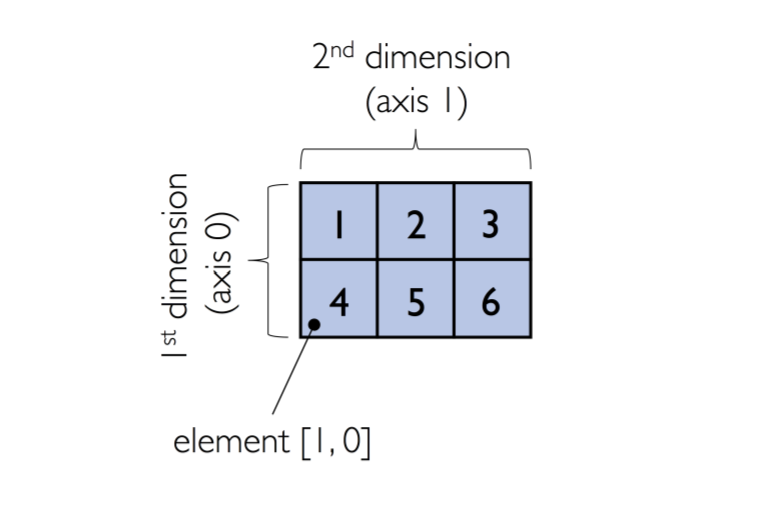

In [45]:
ary[0] # entire first row

array([1, 2, 3])

In [46]:
ary[:, 0] # entire first column

array([1, 4])

In [47]:
ary[:,:2] #first two columns

array([[1, 2],
       [4, 5]])

In [48]:
ary[0, 0]

1

## F.4 Array Math and Universal Functions

In [50]:
lst = [[1,2,3], [4,5,6]]

for row_idx, row_val in enumerate(lst):
    for col_idx, col_val in enumerate(row_val):
        lst[row_idx][col_idx] += 1
        
lst

[[2, 3, 4], [5, 6, 7]]

In [51]:
lst = [[1,2,3],[4,5,6]]
[[cell+1 for cell in row] for row in lst]

[[2, 3, 4], [5, 6, 7]]

In [52]:
ary = np.array([[1,2,3],[4,5,6]])
ary = np.add(ary, 1)
ary

array([[2, 3, 4],
       [5, 6, 7]])

In [53]:
ary + 1

array([[3, 4, 5],
       [6, 7, 8]])

In [54]:
ary ** 2

array([[ 4,  9, 16],
       [25, 36, 49]], dtype=int32)

In [58]:
ary = np.array([[1,2,3],
               [4,5,6]])
np.add.reduce(ary) # column sums

array([5, 7, 9])

In [59]:
np.add.reduce(ary, axis=1) # row sums

array([ 6, 15])

In [61]:
ary.sum(axis = 0) # column sums

array([5, 7, 9])

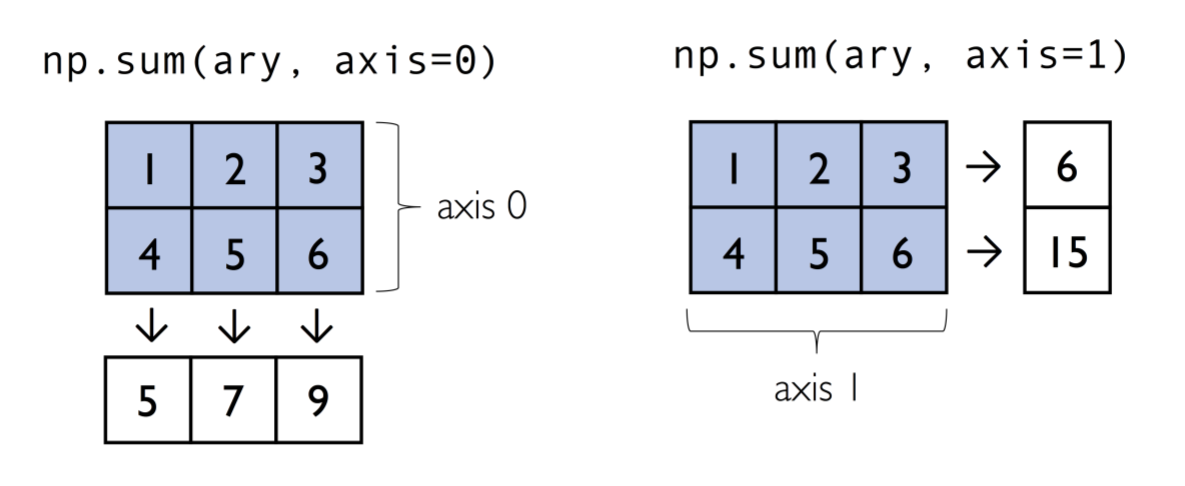

In [62]:
ary.sum()

21

- mean
- std
- var


- np.sort (sorts an array)
- np.argsort (returns indices that would sort and array)
- np.min (returns the minimum value of array)
- np.max (returns the maximum value of array)
- np.argmin (returns the index of the minimum value)
- np.argmax (returns the index of the maximum value)
- array_equal (checks if two arrays have the same shape and elements)

## F.5 Broadcasting

In [64]:
np.array([1,2,3]) + 1

array([2, 3, 4])

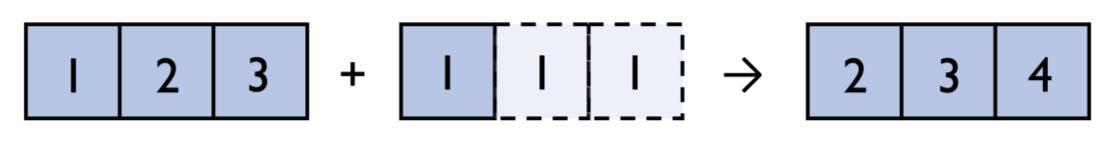

In [65]:
ary1 = np.array([1,2,3])
ary2 = np.array([4,5,6])
ary1 + ary2

array([5, 7, 9])

In [67]:
ary3 = np.array([[4,5,6],[7,8,9]])
ary3 + ary1 # similary, ary1 + ary3 

array([[ 5,  7,  9],
       [ 8, 10, 12]])

In [68]:
try:
    ary3 + np.array([1,2])
except ValueError as e:
    print('ValueError' , e)
    

ValueError operands could not be broadcast together with shapes (2,3) (2,) 


In [69]:
ary3 + np.array([[1], [2]])

array([[ 5,  6,  7],
       [ 9, 10, 11]])

In [70]:
np.array([[1], [2]]) + ary3

array([[ 5,  6,  7],
       [ 9, 10, 11]])

## F.6 Advanced Indexing - Memory Views and Copies

In [71]:
ary = np.array([[1,2,3],
                [4,5,6]])

first_row = ary[0]
first_row += 99
ary

array([[100, 101, 102],
       [  4,   5,   6]])

In [73]:
ary = np.array([[1,2,3],
               [4,5,6]])

first_row = ary[:1]
first_row += 99
ary

array([[100, 101, 102],
       [  4,   5,   6]])

In [74]:
ary = np.array([[1,2,3],
               [4,5,6]])

center_col = ary[:, 1]
center_col += 99
ary

array([[  1, 101,   3],
       [  4, 104,   6]])

In [75]:
second_row = ary[1].copy()
second_row += 99
ary

array([[  1, 101,   3],
       [  4, 104,   6]])

In [77]:
ary = np.array([[1,2,3],
               [4,5,6]])

first_row = ary[:1]
first_row += 99
ary

array([[100, 101, 102],
       [  4,   5,   6]])

In [82]:
np.may_share_memory(first_row, ary)

True

In [79]:
second_row = ary[1].copy()
second_row += 99
ary

array([[100, 101, 102],
       [  4,   5,   6]])

In [80]:
np.may_share_memory(second_row, ary)

False

In [83]:
ary = np.array([[1,2,3],
               [4,5,6]])
ary[:, [0,2]] # first and last column

array([[1, 3],
       [4, 6]])

In [84]:
this_is_a_copy = ary[:, [0,2]]
this_is_a_copy += 99
ary

array([[1, 2, 3],
       [4, 5, 6]])

In [85]:
ary[:, [2,0]] # last and first column

array([[3, 1],
       [6, 4]])

In [87]:
ary = np.array([[1,2,3],
               [4,5,6]])
greater3_mask = ary > 3
greater3_mask

array([[False, False, False],
       [ True,  True,  True]])

In [88]:
ary[greater3_mask]

array([4, 5, 6])

In [89]:
ary[(ary>3) & (ary % 2 == 0)]

array([4, 6])

## F.7 Comparison Operators and Mask

In [90]:
ary = np.array([1,2,3,4])
mask = ary > 2
mask

array([False, False,  True,  True])

In [92]:
ary[mask]

array([3, 4])

In [93]:
mask

array([False, False,  True,  True])

In [94]:
mask.sum()

2

In [95]:
mask.nonzero() # index

(array([2, 3], dtype=int64),)

In [97]:
(ary>2).nonzero() # index

(array([2, 3], dtype=int64),)

In [98]:
np.where(ary>2)

(array([2, 3], dtype=int64),)

In [101]:
np.where(ary > 2, 1, 0) # np.where(condition, x, y), If condition is True, yield x, otherwise yield y.

array([0, 0, 1, 1])

In [102]:
ary = np.array([1,2,3,4])
mask = ary > 2

In [103]:
ary[mask] = 1
ary[~mask] = 0
ary

array([0, 0, 1, 1])

- A : & or np.bitwise_and
- Or : | or np.bitwise_or
- Xor : ^ or np.bitwise_xor
- Not : ~ or np.bitwise_not 

In [104]:
ary = np.array([1,2,3,4])
(ary>3) | (ary < 2)

array([ True, False, False,  True])

In [107]:
~((ary>3) | (ary<2))

array([False,  True,  True, False])

## F.8 Random Number Generators

In [109]:
np.random.seed(123)
np.random.rand(3)

array([0.69646919, 0.28613933, 0.22685145])

In [110]:
rng1 = np.random.RandomState(seed=123)
rng1.rand(3)

array([0.69646919, 0.28613933, 0.22685145])

In [111]:
rng2 = np.random.RandomState(seed=123)
z_scores = rng2.randn(100,2)

In [112]:
import matplotlib.pyplot as plt

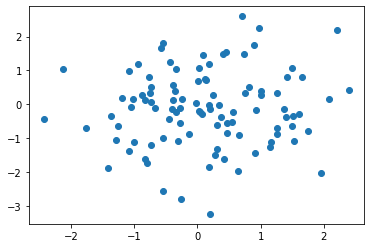

In [114]:
plt.scatter(z_scores[:, 0], z_scores[:, 1])
plt.show()

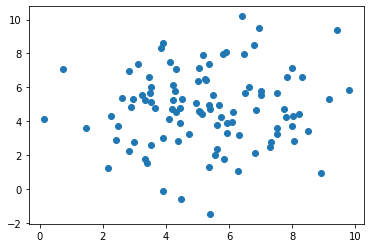

In [115]:
rng3 = np.random.RandomState(seed=123)
scores = 2. * rng3.randn(100,2) + 5.
plt.scatter(scores[:, 0], scores[:, 1])
plt.show()

## F.9 Reshaping Arrays

In [116]:
ary1d = np.array([1,2,3,4,5,6])
ary2d_view = ary1d.reshape(2,3)
ary2d_view

array([[1, 2, 3],
       [4, 5, 6]])

In [117]:
np.may_share_memory(ary2d_view, ary1d)

True

In [118]:
ary1d.reshape(2, -1)

array([[1, 2, 3],
       [4, 5, 6]])

In [119]:
ary1d.reshape(-1, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [120]:
ary2d = np.array([[1,2,3],
                 [4,5,6]])
ary2d.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [121]:
ary2d.ravel()

array([1, 2, 3, 4, 5, 6])

In [122]:
np.may_share_memory(ary2d.flatten(), ary2d) # return copy

False

In [124]:
np.may_share_memory(ary2d.ravel(), ary2d) # return pointer

True

In [125]:
ary = np.array([1,2,3]) # stack along the first axis
np.concatenate((ary, ary))

array([1, 2, 3, 1, 2, 3])

In [126]:
ary = np.array([[1,2,3]]) # stack along the first axis (here : rows)
np.concatenate((ary, ary), axis=0)

array([[1, 2, 3],
       [1, 2, 3]])

In [127]:
#stack along the second axis (here : column)
np.concatenate((ary, ary), axis=1)

array([[1, 2, 3, 1, 2, 3]])

## F.10 Linear Algebra with NumPy Arrays

In [128]:
row_vector = np.array([1,2,3])
row_vector

array([1, 2, 3])

In [129]:
column_vector = np.array([[1,2,3]]).reshape(-1, 1)
column_vector

array([[1],
       [2],
       [3]])

In [130]:
row_vector[:,np.newaxis]

array([[1],
       [2],
       [3]])

In [131]:
row_vector[:, None]

array([[1],
       [2],
       [3]])

In [132]:
matrix = np.array([[1,2,3],
                  [4,5,6]])

np.matmul(matrix, column_vector)

array([[14],
       [32]])

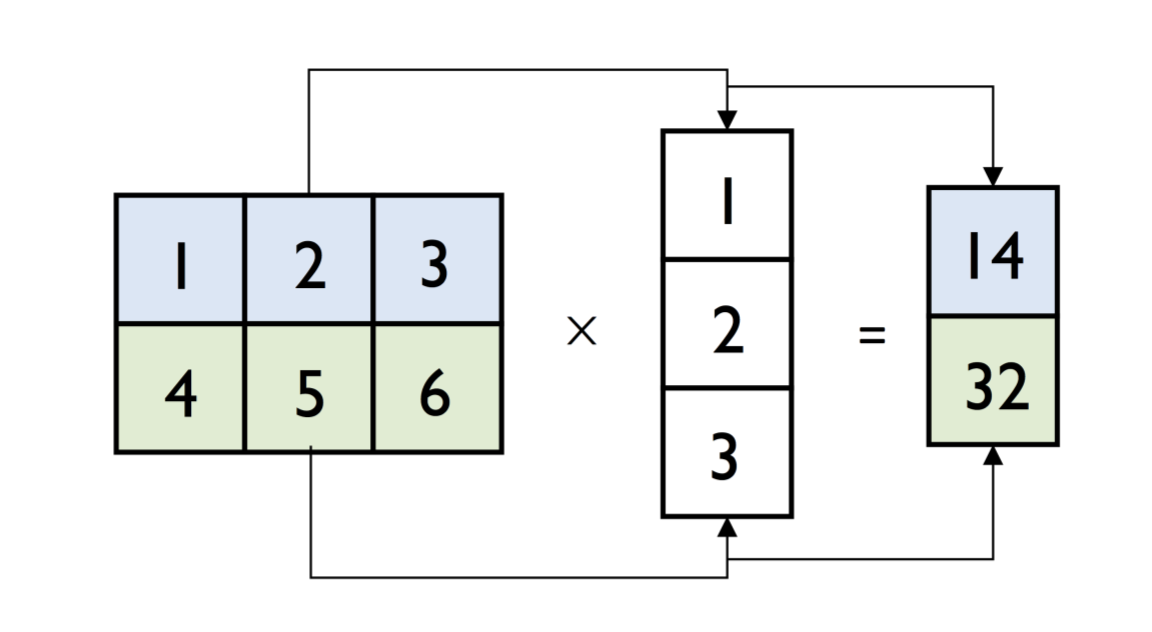

In [133]:
np.matmul(matrix, row_vector)

array([14, 32])

In [134]:
np.matmul(row_vector, row_vector)

14

In [135]:
np.dot(row_vector, row_vector)

14

In [136]:
np.dot(matrix, row_vector)

array([14, 32])

In [137]:
np.dot(matrix, column_vector)

array([[14],
       [32]])

In [140]:
matrix = np.array([[1,2,3],
                 [4,5,6]])
matrix.transpose()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [143]:
np.matmul(matrix, matrix.transpose())

array([[14, 32],
       [32, 77]])

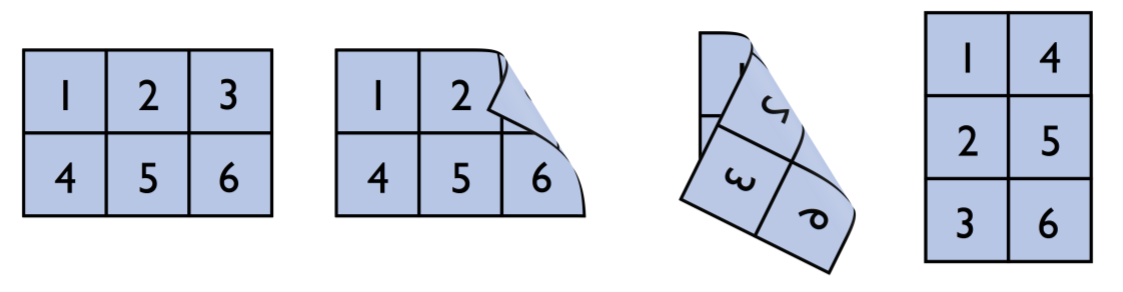

In [142]:
matrix.T

array([[1, 4],
       [2, 5],
       [3, 6]])

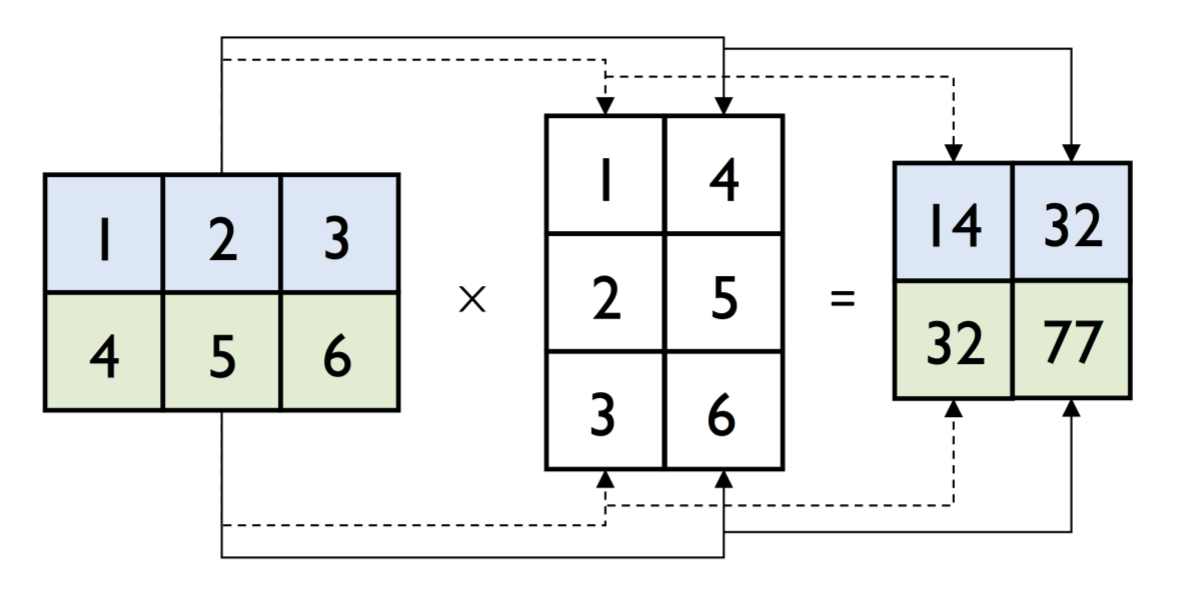

## F.11 Set Operations

In [144]:
ary = np.array([1,1,2,3,1,5])
ary_set = np.unique(ary)
ary_set

array([1, 2, 3, 5])

In [145]:
ary1 = np.array([1,2,3])
ary2 = np.array([3,4,5,6])
np.intersect1d(ary1, ary2, assume_unique=True)

array([3])

In [146]:
np.setdiff1d(ary1, ary2, assume_unique=True) 

array([1, 2])

In [147]:
np.union1d(ary1, ary2) # dose not have assume_unique

array([1, 2, 3, 4, 5, 6])

In [148]:
# NumPy does not have a function for the symmetric set difference, but it can be readily computed by composition

In [149]:
np.union1d(np.setdiff1d(ary1, ary2, assume_unique=True),
          np.setdiff1d(ary2, ary1, assume_unique=True))

array([1, 2, 4, 5, 6])

## F.12 Serializing NumPy Arrays

In [150]:
ary1 = np.array([1,2,3])
np.save('ary-data.npy', ary1)
np.load('ary-data.npy')

array([1, 2, 3])

In [151]:
np.savez('ary-data.npz', ary1, ary2)

In [155]:
d = np.load('ary-data.npz')
d.keys()

KeysView(<numpy.lib.npyio.NpzFile object at 0x0000021934EE9F40>)

In [156]:
d['arr_0']

array([1, 2, 3])

In [157]:
kwargs = {'ary1':ary1, 'ary2':ary2}
np.savez('ary-data.npz', **kwargs)

In [158]:
np.load('ary-data.npz')

In [159]:
d = np.load('ary-data.npz')
d['ary1']

array([1, 2, 3])